#### Importing the libraries

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve

#### Reading the Dataset

In [2]:
df_train = pd.read_excel('D:\SEM 4\Supervised Machine Learning Lab\\train.xlsx')

In [3]:
df_train.head(5)

,Loan_ID,Gender,Married,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Property_Area,Loan_Status
0,1,1,0,0,0,5849,0,0,360,2,1
1,2,1,1,1,0,4583,1508,128,360,1,0
2,3,1,1,0,1,3000,0,66,360,2,1
3,4,1,1,0,0,2583,2358,120,360,2,1
4,5,1,0,0,0,6000,0,141,360,2,1


In [6]:
df_test=pd.read_excel('D:\SEM 4\Supervised Machine Learning Lab\\test.xlsx')

In [7]:
df_test.head(5)

,Loan_ID,Gender,Married,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Property_Area,Loan_Status
0,7,1,1,0,0,2333,1516.0,95,360,2,1
1,8,1,1,3,0,3036,2504.0,158,360,0,0
2,13,1,1,2,0,3073,8106.0,200,360,2,1
3,20,1,1,0,1,2600,3500.0,115,0,2,1
4,22,1,1,1,0,5955,5625.0,315,360,2,1


#### Checking for NULL values

In [10]:
df_train.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Property_Area        0
Loan_Status          0
dtype: int64

In [11]:
df_test.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Property_Area        0
Loan_Status          0
dtype: int64

#### Dividing into train and test

In [12]:
X_train = df_train.drop(columns=['Loan_Status', 'Loan_ID'])
y_train = df_train['Loan_Status']
X_test = df_test.drop(columns=['Loan_Status', 'Loan_ID'])
y_test = df_test['Loan_Status']

In [13]:
X_train

,Gender,Married,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Property_Area
0,1,0,0,0,5849,0,0,360,2
1,1,1,1,0,4583,1508,128,360,1
2,1,1,0,1,3000,0,66,360,2
3,1,1,0,0,2583,2358,120,360,2
4,1,0,0,0,6000,0,141,360,2
...,...,...,...,...,...,...,...,...,...
432,1,1,0,0,3232,1950,108,360,1
433,0,0,0,0,2900,0,71,360,1
434,1,1,3,0,4106,0,40,180,1
435,1,1,1,0,8072,240,253,360,2


In [14]:
X_test

,Gender,Married,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Property_Area
0,1,1,0,0,2333,1516.0,95,360,2
1,1,1,3,0,3036,2504.0,158,360,0
2,1,1,2,0,3073,8106.0,200,360,2
3,1,1,0,1,2600,3500.0,115,0,2
4,1,1,1,0,5955,5625.0,315,360,2
...,...,...,...,...,...,...,...,...,...
172,1,1,0,1,9963,0.0,180,360,1
173,1,0,0,0,3676,4301.0,172,360,1
174,0,1,1,0,12000,0.0,496,360,0
175,1,1,2,0,3987,1411.0,157,360,1


In [15]:
y_train

0      1
1      0
2      1
3      1
4      1
      ..
432    1
433    1
434    1
435    1
436    1
Name: Loan_Status, Length: 437, dtype: int64

In [16]:
y_test

0      1
1      0
2      1
3      1
4      1
      ..
172    1
173    1
174    1
175    1
176    0
Name: Loan_Status, Length: 177, dtype: int64

#### Without GridSearchCV

In [17]:
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

In [18]:
y_pred = svm_model.predict(X_test)

In [19]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.655367231638418


#### With GridSearchCV

In [23]:
param_grid = {'C': [1, 10, 100, 1000],
              'gamma': [0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

In [24]:
svm_model = SVC()
grid_search = GridSearchCV(svm_model, param_grid, refit=True, verbose=1, cv=5)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 10, 100, 1000],
                         'gamma': [0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=1)

In [28]:
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}


In [27]:
accuracy = grid_search.best_score_ * 100
print("Accuracy for our training dataset without tuning is: {:.2f}%".format(accuracy))

Accuracy for our training dataset without tuning is: 69.34%


In [29]:
y_pred = grid_search.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on the test dataset:", test_accuracy)

Accuracy on the test dataset: 0.6892655367231638


#### Basic EDA

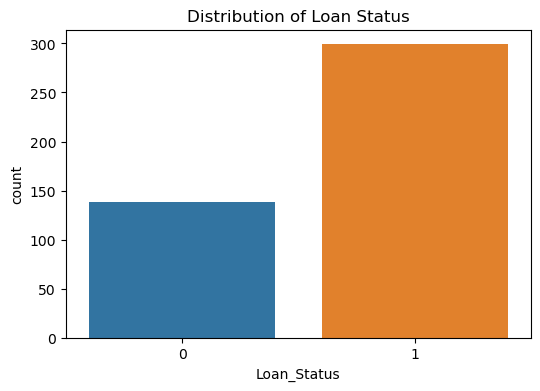

In [34]:
# Visualize the distribution of the Loan status
plt.figure(figsize=(6, 4))
sns.countplot(x='Loan_Status', data=df_train)
plt.title('Distribution of Loan Status')
plt.show()

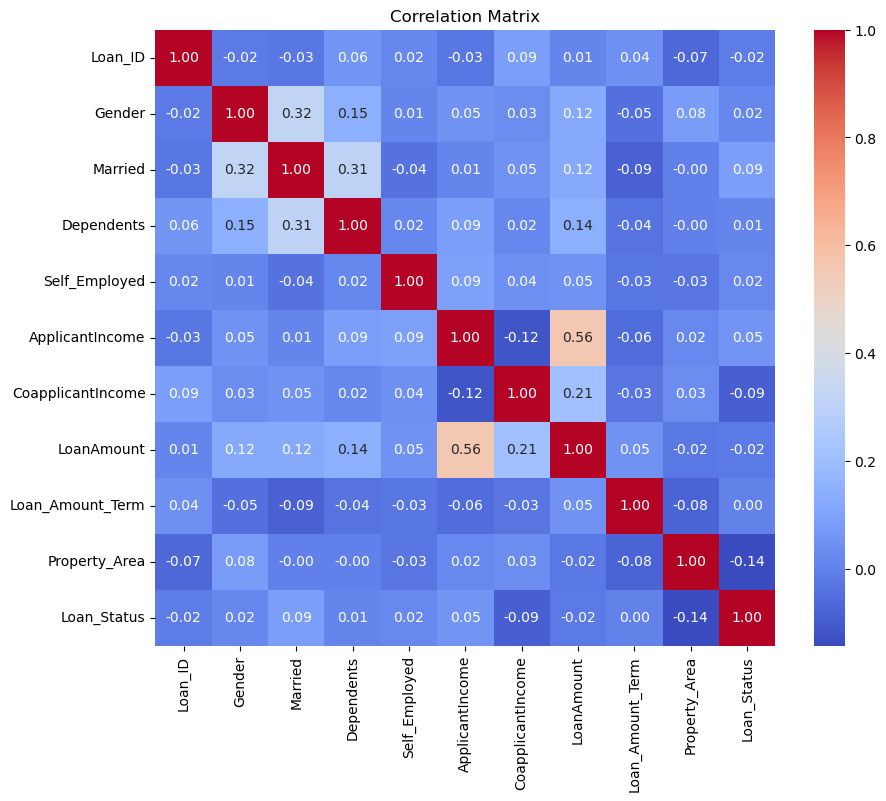

In [35]:
# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df_train.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

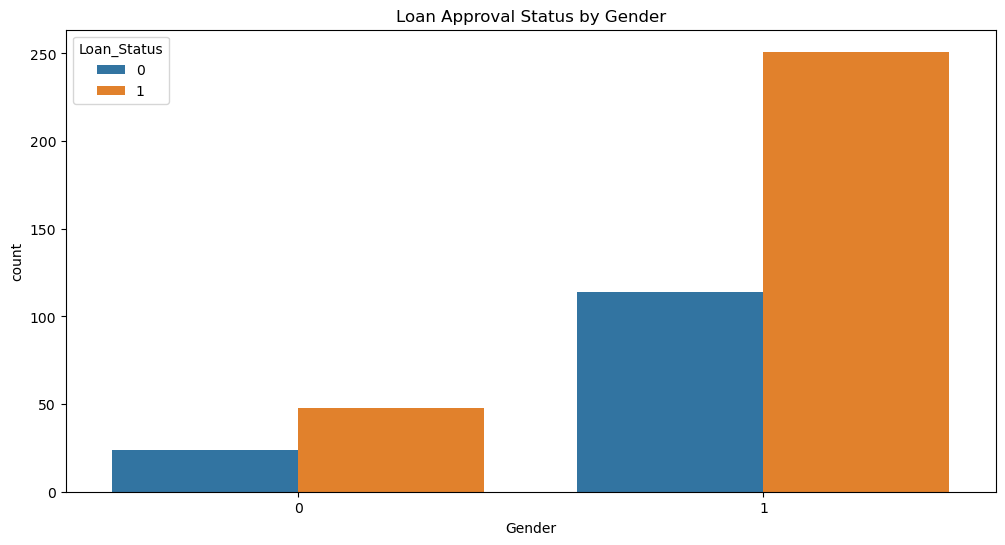

In [36]:
# Visualize the relationship between the Gender and the target variable
plt.figure(figsize=(12, 6))
sns.countplot(x='Gender', hue='Loan_Status', data=df_train)
plt.title('Loan Approval Status by Gender')
plt.show()